In [ ]:
## Importing liabreary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Checking the missing values
df = pd.read_csv('/content/Amazon Sale Report.csv')

/tmp/ipython-input-1534915836.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Amazon Sale Report.csv')


In [ ]:
## The information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70940 entries, 0 to 70939
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               70940 non-null  int64  
 1   Order ID            70940 non-null  object 
 2   Date                70940 non-null  object 
 3   Status              70940 non-null  object 
 4   Fulfilment          70940 non-null  object 
 5   Sales Channel       70940 non-null  object 
 6   ship-service-level  70940 non-null  object 
 7   Category            70940 non-null  object 
 8   Size                70940 non-null  object 
 9   Courier Status      70940 non-null  object 
 10  Qty                 70940 non-null  int64  
 11  currency            66696 non-null  object 
 12  Amount              66695 non-null  float64
 13  ship-city           70922 non-null  object 
 14  ship-state          70922 non-null  object 
 15  ship-postal-code    70922 non-null  float64
 16  ship

In [ ]:
## Checking the missing values
df.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [ ]:
# Showing the  first five rows
df.head(5)


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [ ]:
# Drop unnecessary columns
df_clean = df.drop(columns=["index", "New", "PendingS"])


In [ ]:

# Removeing the duplicates
df_clean = df_clean.drop_duplicates()


In [ ]:

# Convert Date to datetime
df_clean["Date"] = pd.to_datetime(df_clean["Date"], errors="coerce")

/tmp/ipython-input-3721798462.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean["Date"] = pd.to_datetime(df_clean["Date"], errors="coerce")


In [ ]:

# Convert postal code to string (fill NaN first)
df_clean["ship-postal-code"] = df_clean["ship-postal-code"].fillna(-1).astype(int).astype(str)
df_clean["ship-postal-code"] = df_clean["ship-postal-code"].replace("-1", "Unknown")

In [ ]:
## Hendeling the missing values
# Drop rows with missing Amount
df_clean = df_clean.dropna(subset=["Amount"])
df_clean["fulfilled-by"] = df_clean["fulfilled-by"].fillna("Unknown")
df_clean["ship-city"] = df_clean["ship-city"].fillna("Unknown")
df_clean["ship-state"] = df_clean["ship-state"].fillna("Unknown")
df_clean["ship-country"] = df_clean["ship-country"].fillna("Unknown")

In [ ]:
# Reset index after cleaning
df_clean = df_clean.reset_index(drop=True)

In [ ]:
# Summary after cleaning
clean_shape = df_clean.shape
missing_after = df_clean.isnull().sum()

In [ ]:
df_clean.head(5)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,True,Unknown
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,False,Unknown


In [ ]:


# Total Sales & Orders
total_sales = df_clean["Amount"].sum()
total_orders = df_clean["Order ID"].nunique()


In [ ]:

# Sales trend over time (monthly)
monthly_sales = df_clean.groupby(df_clean["Date"].dt.to_period("M"))["Amount"].sum()


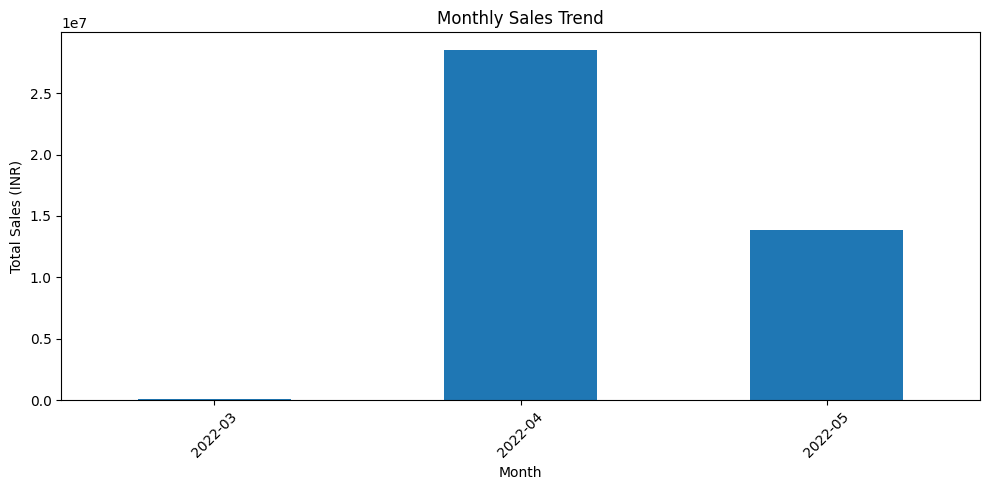

In [ ]:
# Plot sales trend
plt.figure(figsize=(10,5))
monthly_sales.plot(kind="bar")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
## Product Analysis

##cleaning steps quickly
df_clean = df.drop(columns=["index", "New", "PendingS"])
df_clean = df_clean.drop_duplicates()
df_clean["Date"] = pd.to_datetime(df_clean["Date"], errors="coerce")
df_clean["ship-postal-code"] = df_clean["ship-postal-code"].fillna(-1).astype(int).astype(str)
df_clean["ship-postal-code"] = df_clean["ship-postal-code"].replace("-1", "Unknown")
df_clean = df_clean.dropna(subset=["Amount"])
df_clean["fulfilled-by"] = df_clean["fulfilled-by"].fillna("Unknown")
df_clean["ship-city"] = df_clean["ship-city"].fillna("Unknown")
df_clean["ship-state"] = df_clean["ship-state"].fillna("Unknown")
df_clean["ship-country"] = df_clean["ship-country"].fillna("Unknown")
df_clean = df_clean.reset_index(drop=True)

/tmp/ipython-input-1148178552.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean["Date"] = pd.to_datetime(df_clean["Date"], errors="coerce")


In [ ]:
category_sales = df_clean.groupby("Category")["Amount"].sum().sort_values(ascending=False)
category_qty = df_clean.groupby("Category")["Qty"].sum().sort_values(ascending=False)
size_qty = df_clean.groupby("Size")["Qty"].sum().sort_values(ascending=False)


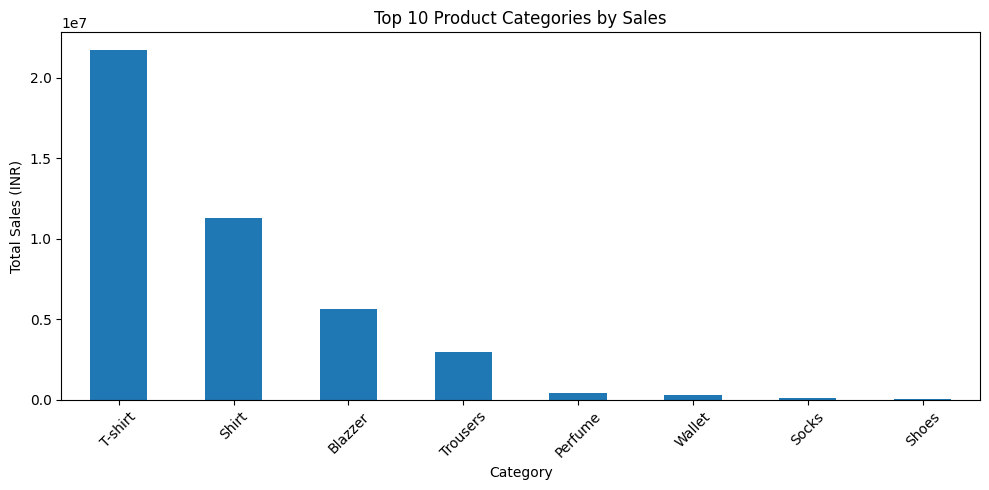

In [ ]:
# Plot top categories by sales
plt.figure(figsize=(10,5))
category_sales.head(10).plot(kind="bar")
plt.title("Top 10 Product Categories by Sales")
plt.ylabel("Total Sales (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


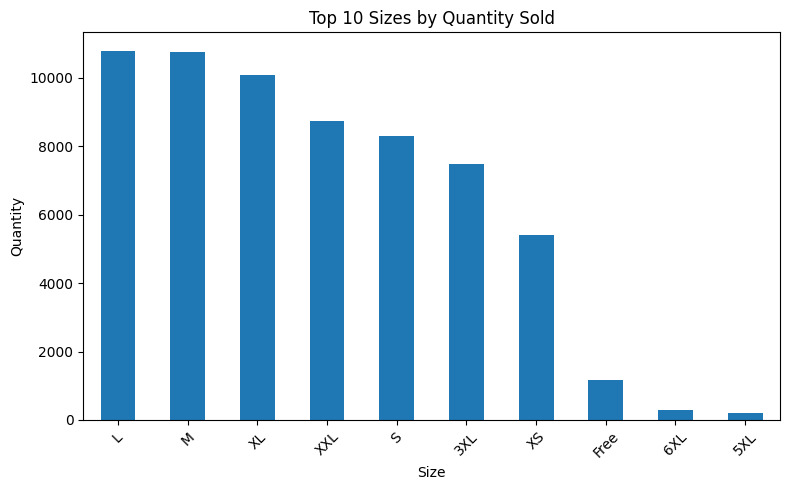

In [ ]:
# Plot top sizes by quantity
plt.figure(figsize=(8,5))
size_qty.head(10).plot(kind="bar")
plt.title("Top 10 Sizes by Quantity Sold")
plt.ylabel("Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
## Fulfillment Analysis

# Sales by Fulfilment method
fulfilment_sales = df_clean.groupby("Fulfilment")["Amount"].sum().sort_values(ascending=False)

# Count of orders by Fulfilment method
fulfilment_orders = df_clean.groupby("Fulfilment")["Order ID"].nunique().sort_values(ascending=False)

# Sales by 'fulfilled-by'
fulfilled_by_sales = df_clean.groupby("fulfilled-by")["Amount"].sum().sort_values(ascending=False)


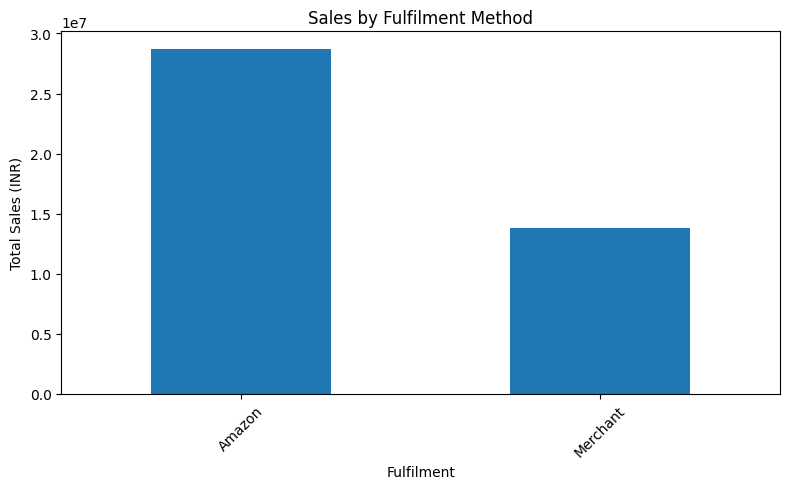

In [ ]:
# Plot Sales by Fulfilment method
plt.figure(figsize=(8,5))
fulfilment_sales.plot(kind="bar")
plt.title("Sales by Fulfilment Method")
plt.ylabel("Total Sales (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

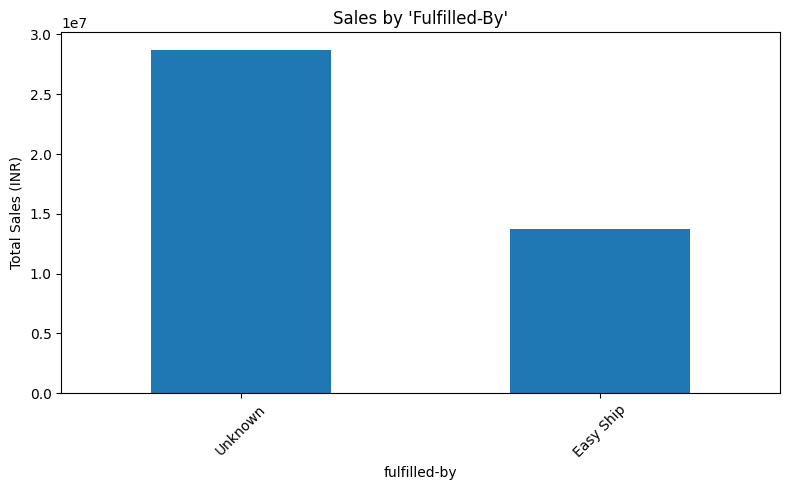

In [ ]:
# Plot Sales by Fulfilled-By
plt.figure(figsize=(8,5))
fulfilled_by_sales.plot(kind="bar")
plt.title("Sales by 'Fulfilled-By'")
plt.ylabel("Total Sales (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

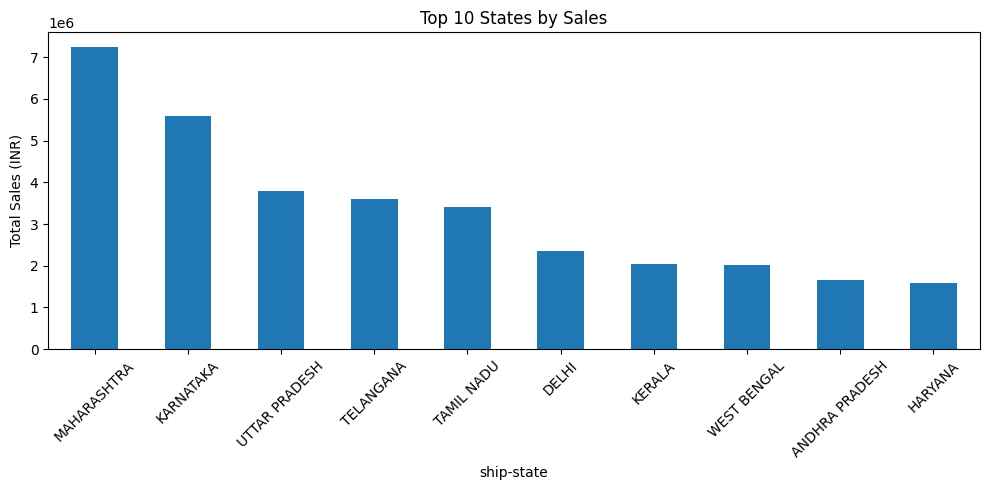

In [ ]:
## Customer Segmentation
# Sales by State
state_sales = df_clean.groupby("ship-state")["Amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
state_sales.head(10).plot(kind="bar")
plt.title("Top 10 States by Sales")
plt.ylabel("Total Sales (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

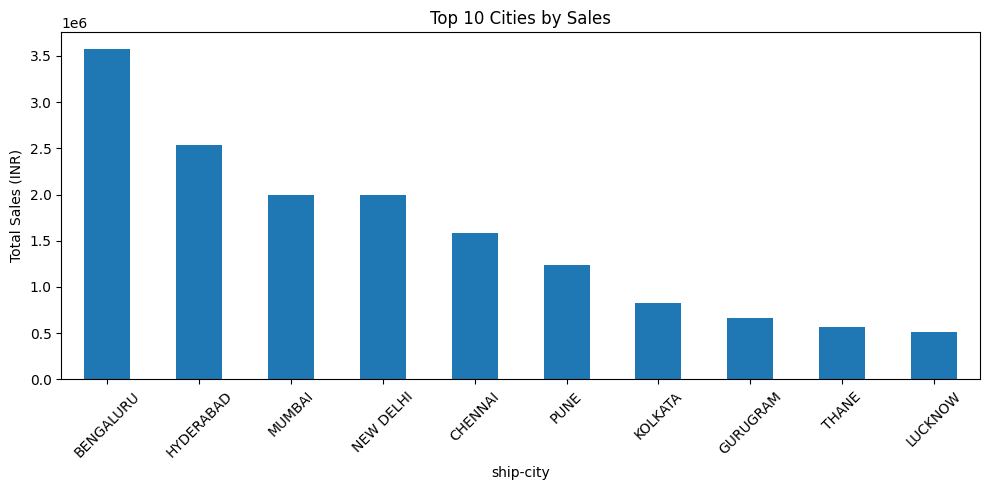

In [ ]:
 ## Sales by City
city_sales = df_clean.groupby("ship-city")["Amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
city_sales.head(10).plot(kind="bar")
plt.title("Top 10 Cities by Sales")
plt.ylabel("Total Sales (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


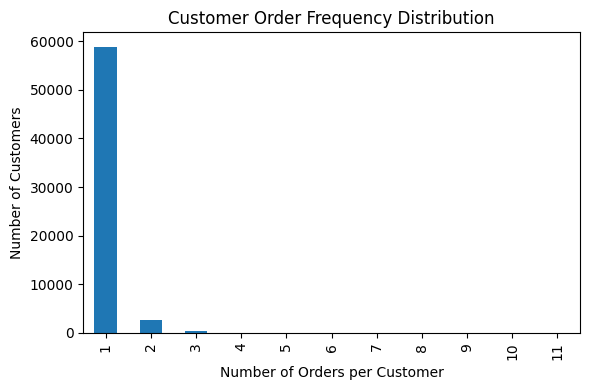

In [ ]:
#Customer frequency (how many times each Order ID appears)
customer_frequency = df_clean["Order ID"].value_counts()

# Distribution of order frequency
plt.figure(figsize=(6,4))
customer_frequency.value_counts().sort_index().plot(kind="bar")
plt.title("Customer Order Frequency Distribution")
plt.xlabel("Number of Orders per Customer")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

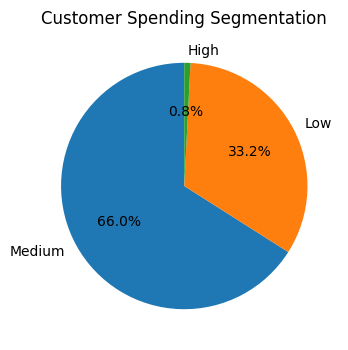

In [ ]:
## total spend per Order ID
customer_spend = df_clean.groupby("Order ID")["Amount"].sum()

# Define segments: Low (<500), Medium (500–2000), High (>2000)
spend_segments = pd.cut(customer_spend,
                        bins=[0, 500, 2000, float("inf")],
                        labels=["Low", "Medium", "High"])

segment_counts = spend_segments.value_counts()

plt.figure(figsize=(6,4))
segment_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Customer Spending Segmentation")
plt.ylabel("")
plt.show()

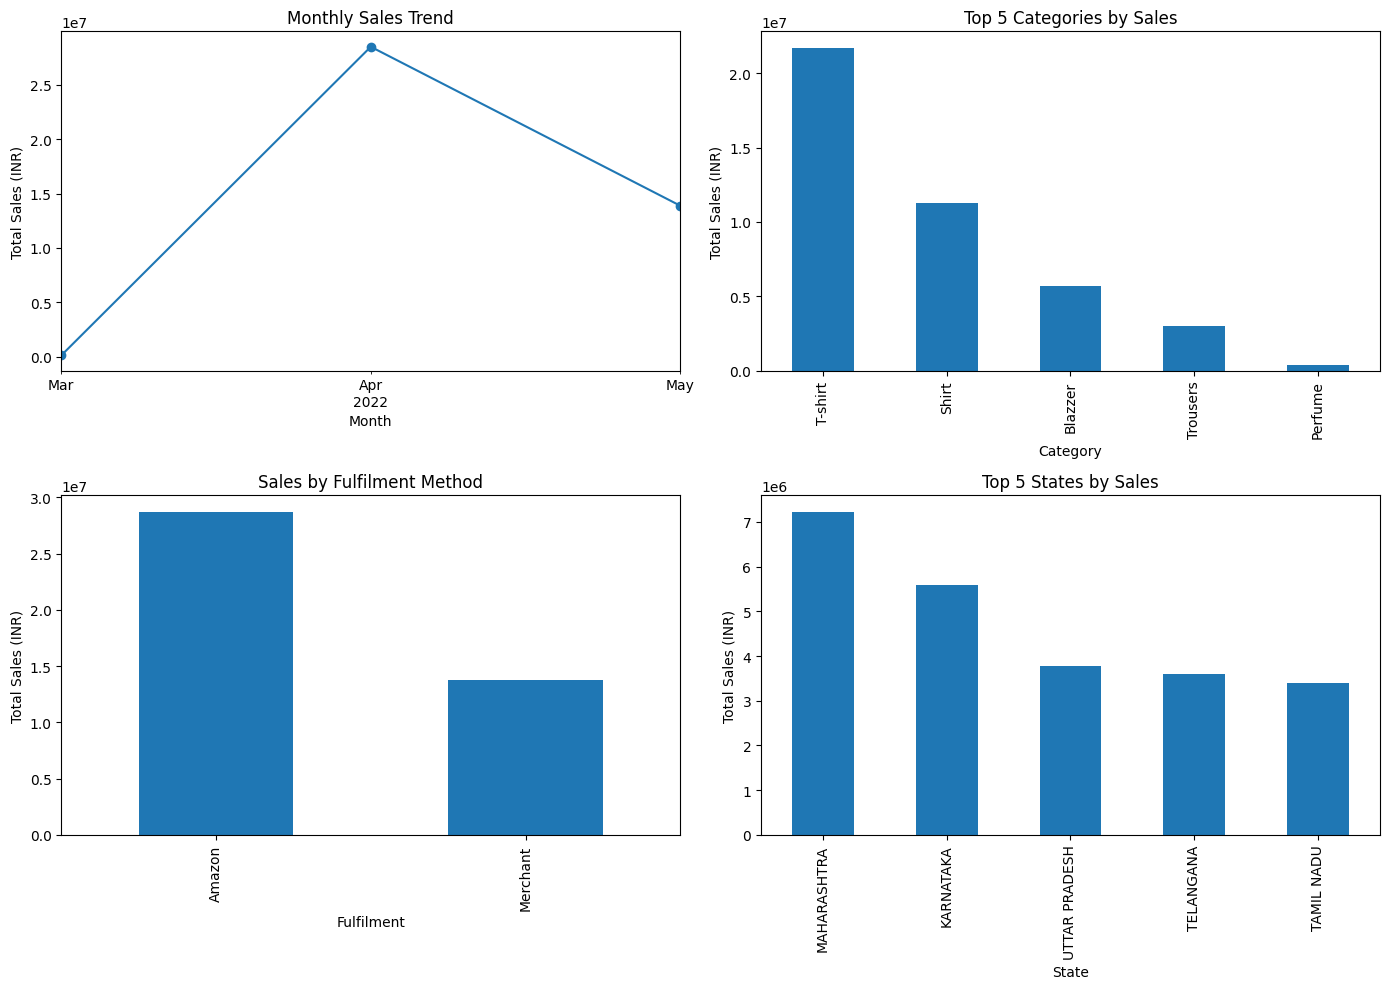

In [ ]:
## Geographical Analysis

# Create a multi-chart dashboard
fig, axes = plt.subplots(2, 2, figsize=(14,10))

#Sales Trend over Time
monthly_sales = df_clean.groupby(df_clean["Date"].dt.to_period("M"))["Amount"].sum()
monthly_sales.plot(kind="line", marker="o", ax=axes[0,0])
axes[0,0].set_title("Monthly Sales Trend")
axes[0,0].set_xlabel("Month")
axes[0,0].set_ylabel("Total Sales (INR)")

#Top Categories by Sales
category_sales = df_clean.groupby("Category")["Amount"].sum().sort_values(ascending=False).head(5)
category_sales.plot(kind="bar", ax=axes[0,1])
axes[0,1].set_title("Top 5 Categories by Sales")
axes[0,1].set_ylabel("Total Sales (INR)")
axes[0,1].set_xlabel("Category")

#Sales by Fulfilment Method
fulfilment_sales = df_clean.groupby("Fulfilment")["Amount"].sum()
fulfilment_sales.plot(kind="bar", ax=axes[1,0])
axes[1,0].set_title("Sales by Fulfilment Method")
axes[1,0].set_ylabel("Total Sales (INR)")
axes[1,0].set_xlabel("Fulfilment")

# Top States by Sales
state_sales = df_clean.groupby("ship-state")["Amount"].sum().sort_values(ascending=False).head(5)
state_sales.plot(kind="bar", ax=axes[1,1])
axes[1,1].set_title("Top 5 States by Sales")
axes[1,1].set_ylabel("Total Sales (INR)")
axes[1,1].set_xlabel("State")

plt.tight_layout()
plt.show()

